[6, 3, 8, 4, 11]
[0.2, 0.14, 0.35, 0.3, 0.01]
MultiGraph with 1000 nodes and 3179 edges


C:\Users\HP\AppData\Local\Temp\ipykernel_14116\1176682156.py:63: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


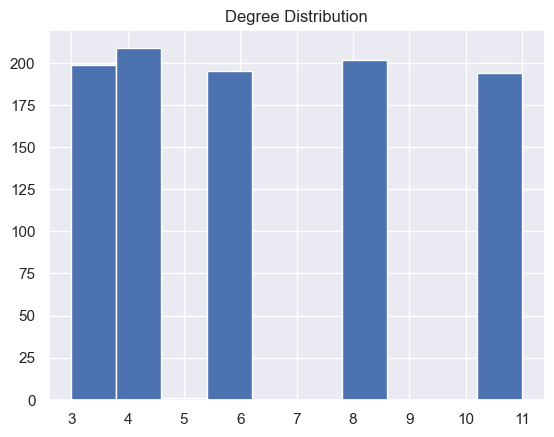

In [11]:

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from node2vec import Node2Vec as n2v
sns.set()


def generate_graph_deg_dist(deg_dist, n):
    '''
    This function will generate a networkx graph G based on a degree distribution
    provided by the user.

    params:
        deg_dist (Dictionary) : The key will be the degree and the value is the probability
                                of a node having that degree. The probabilities must sum to
                                1
        n (Integer) : The number of nodes you want the graph to yield

    example:
        G = generate_graph_deg_dist(
                deg_dist = {
                    6:0.2,
                    3:0.14,
                    8:0.35,
                    4:0.3,
                    11:0.01
                },
                n = 1000
        )
    '''
    deg = list(deg_dist.keys())
    print(deg)
    proba = list(deg_dist.values())
    print(proba)
    if sum(proba) == 1.:
        deg_sequence = np.random.choice(
            deg,
            n,
            proba
        )

        if sum(deg_sequence) % 2 != 0:
            # to ensure that the degree sequence is always even for the configuration model
            deg_sequence[1] = deg_sequence[1] + 1

        return nx.configuration_model(deg_sequence)
    raise ValueError("Probabilities do not equal to 1")


G = generate_graph_deg_dist(
    deg_dist={
        6: 0.2,
        3: 0.14,
        8: 0.35,
        4: 0.3,
        11: 0.01
    },
    n=1000
)

print(nx.info(G))

# visualize degree distribution
plt.clf()
plt.hist(list(dict(G.degree()).values()))
plt.title('Degree Distribution')
plt.show()


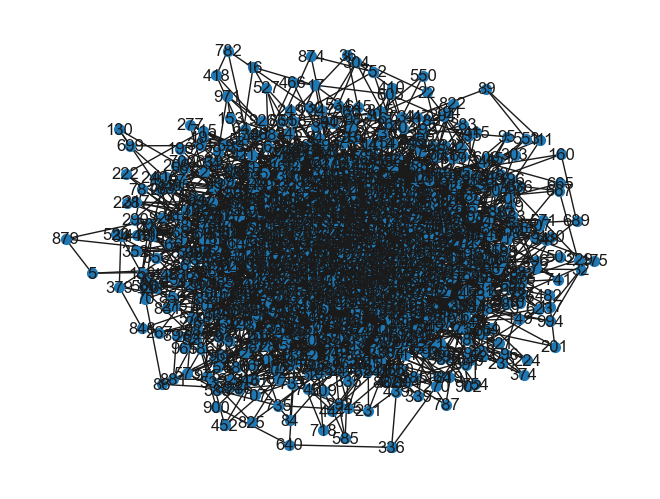

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Tu código para generar el grafo previamente definido

# Visualizar el grafo
nx.draw(G, with_labels=True, node_size=50)
plt.show()


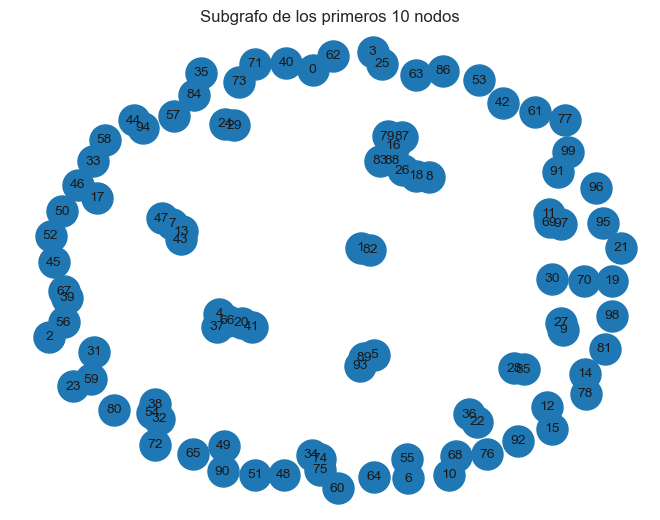

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Supongamos que ya tienes el grafo G definido

# Obtener los primeros 10 nodos
first_10_nodes = list(G.nodes())[:100]

# Crear un subgrafo que incluya solo los primeros 10 nodos y sus aristas correspondientes
subgraph = G.subgraph(first_10_nodes)

# Dibujar el subgrafo
# Posiciones de los nodos para la visualización
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=10)
plt.title("Subgrafo de los primeros 10 nodos")
plt.show()


In [2]:

WINDOW = 1  # Node2Vec fit window
MIN_COUNT = 1  # Node2Vec min. count
BATCH_WORDS = 4  # Node2Vec batch words

g_emb = n2v(
    G,
    dimensions=16
)

mdl = g_emb.fit(
    vector_size=16,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

input_node = '1'
for s in mdl.wv.most_similar(input_node, topn=10):
    print(s)


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:16<00:00,  1.65s/it]


('410', 0.8533179759979248)
('505', 0.7874178886413574)
('855', 0.7817179560661316)
('69', 0.7587977051734924)
('709', 0.7516368627548218)
('545', 0.7414316534996033)
('175', 0.7395215034484863)
('105', 0.7315643429756165)
('969', 0.7290278673171997)
('157', 0.7232987880706787)


In [3]:

emb_df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in G.nodes()],
        index=G.nodes
    )
)


[]

<Figure size 640x480 with 0 Axes>

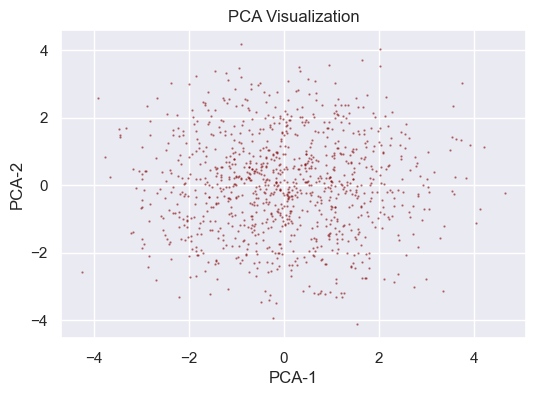

In [4]:

pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x', 'y'],
        index=emb_df.index
    )
)
plt.clf()
fig = plt.figure(figsize=(6, 4))
plt.scatter(
    x=emb_df_PCA['x'],
    y=emb_df_PCA['y'],
    s=0.4,
    color='maroon',
    alpha=0.5
)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()
